# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Загрузка и обзор данных

In [ ]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [ ]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
df_0.describe(include='all')

,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99990,NaN,NaN,NaN,NaN
top,QcMuo,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.500419,0.250143,2.502647,92.500000
std,NaN,0.871832,0.504433,3.248248,44.288691
min,NaN,-1.408605,-0.848218,-12.088328,0.000000
25%,NaN,-0.072580,-0.200881,0.287748,56.497507
50%,NaN,0.502360,0.250252,2.515969,91.849972
75%,NaN,1.073581,0.700646,4.715088,128.564089


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
df_1.describe(include='all')

,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,bfPNe,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,1.141296,-4.796579,2.494541,68.825000
std,NaN,8.965932,5.119872,1.703572,45.944423
min,NaN,-31.609576,-26.358598,-0.018144,0.000000
25%,NaN,-6.298551,-8.267985,1.000021,26.953261
50%,NaN,1.153055,-4.813172,2.011479,57.085625
75%,NaN,8.621015,-1.332816,3.999904,107.813044


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
df_2.describe(include='all')

,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,KUPhW,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.002023,-0.002081,2.495128,95.000000
std,NaN,1.732045,1.730417,3.473445,44.749921
min,NaN,-8.760004,-7.084020,-11.970335,0.000000
25%,NaN,-1.162288,-1.174820,0.130359,59.450441
50%,NaN,0.009424,-0.009482,2.484236,94.925613
75%,NaN,1.158535,1.163678,4.858794,130.595027


Наблюдения:
- столбец id можно удалить (он не нужен для обучения модели)
- признаки уже численные, их необходимо только масшабировать
- пропусков в данных нет

### Деление на выборки

Мы должны выделить признаки и таргеты, разбить на обучающую и валидационые выборки и затем перед обучением провести масштабирование признаков, настроив скелер на обучающую выборку

Для удобства (чтобы не копировать код 3 раза) напишем функцию, которой на вход подаем датасет, а она его делит на выборки, масштабирует признаки и возращает подготовленные фичи и таргеты

In [ ]:
def data_prepared(data):
    features = data.drop(columns='product')
    target = data['product']
    features_train, features_valid = train_test_split(features, test_size=0.25, random_state=12345)
    target_train, target_valid = train_test_split(target, test_size=0.25, random_state=12345)
    
    scaler = StandardScaler()
    pd.options.mode.chained_assignment = None
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    return (features_train, features_valid, target_train, target_valid)

Вывод:

- данные по каждому из трех регионов загружены и рассмотренны
- создали функцию, которая делит датасеты на фичи и таргеты и масштабирует признаки

### Предообработка данных

Удалим в датасетах столбец id

In [ ]:
df_0 = df_0.drop(columns='id')
df_0.head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


In [ ]:
df_1 = df_1.drop(columns='id')
df_1.head()

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


In [ ]:
df_2 = df_2.drop(columns='id')
df_2.head()

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


## Обучение и проверка модели

### Регион 1

По заданию необходимо вычислить средний объем сырья в скважинах и метрику RMSE. Дополнительно к этому вычислим еще метрику MAE, так как она более устойчива к выбросам

In [ ]:
model_1 = LinearRegression()
features_train_1, features_valid_1, target_train_1, target_valid_1 = data_prepared(df_0)

model_1.fit(features_train_1, target_train_1)
predicted_valid_1 = model_1.predict(features_valid_1)

#аргумент squared=False позволяет вычислить сразу RMSE
rmse_1 = mean_squared_error(target_valid_1, predicted_valid_1, squared=False)
mae_1 = mean_absolute_error(target_valid_1, predicted_valid_1)
print(f'Средний запас предсказанного сырья в регионе 1 = {predicted_valid_1.mean()}')
print(f'RMSE = {rmse_1}')
print(f'MAE = {mae_1}')

Средний запас предсказанного сырья в регионе 1 = 92.59256778438035
RMSE = 37.5794217150813
MAE = 30.919600777151313


In [ ]:
predicted_valid_1

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

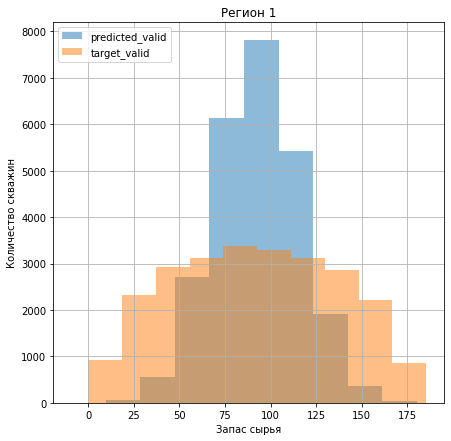

In [ ]:
plt.figure(figsize=(7,7))
plt.grid()

plt.hist(predicted_valid_1, alpha=0.5, label='predicted_valid');
plt.hist(target_valid_1, alpha=0.5, label='target_valid');

plt.title('Регион 1')
plt.xlabel('Запас сырья')
plt.ylabel('Количество скважин')
plt.legend(loc='upper left')

plt.show();

In [ ]:
print(f'Реальный средний запас сырья = {target_valid_1.mean()}')
print(f'Средний запас предсказанного сырья в регионе 1 = {predicted_valid_1.mean()}')

Реальный средний запас сырья = 92.07859674082927
Средний запас предсказанного сырья в регионе 1 = 92.59256778438035


Видим, реальный средний запас сырья и предсказанный моделью практически одинаковы. Значения с запасом сырья нормально распределены вокруг среднего

Для удобства дальнейшего сравнения регионов - будем добавлять средние запасы сырья и метрики в массив region_list

In [ ]:
region_list = []

In [ ]:
region_list.append(('Регион 1',predicted_valid_1.mean(), rmse_1, mae_1))

### Регион 2

In [ ]:
model_2 = LinearRegression()
features_train_2, features_valid_2, target_train_2, target_valid_2 = data_prepared(df_1)

model_2.fit(features_train_2, target_train_2)
predicted_valid_2 = model_2.predict(features_valid_2)

#аргумент squared=False позволяет вычислить сразу RMSE
rmse_2 = mean_squared_error(target_valid_2, predicted_valid_2, squared=False)
mae_2 = mean_absolute_error(target_valid_2, predicted_valid_2)

print(f'Средний запас предсказанного сырья в регионе 2 = {predicted_valid_2.mean()}')
print(f'RMSE = {rmse_2}')
print(f'MAE = {mae_2}')

Средний запас предсказанного сырья в регионе 2 = 68.728546895446
RMSE = 0.893099286775617
MAE = 0.7187662442124758


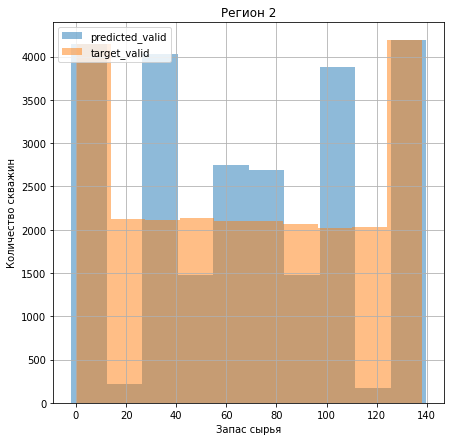

In [ ]:
plt.figure(figsize=(7,7))
plt.grid()

plt.hist(predicted_valid_2, alpha=0.5, label='predicted_valid');
plt.hist(target_valid_2, alpha=0.5, label='target_valid');

plt.title('Регион 2')
plt.xlabel('Запас сырья')
plt.ylabel('Количество скважин')
plt.legend(loc='upper left')

plt.show();

In [ ]:
print(f'Реальный средний запас сырья = {target_valid_2.mean()}')
print(f'Средний запас предсказанного сырья в регионе 2 = {predicted_valid_2.mean()}')

Реальный средний запас сырья = 68.72313602435997
Средний запас предсказанного сырья в регионе 2 = 68.728546895446


Распределение запасов сырья по скважинам в Регионе 2 очень интересное! Видим, что есть около 4000 пустых скважин, так и столько же скважин с огромным запасом сырья (в 2 раза превышающим среднее количество сырья). Регион выглядит рискованным для инвестиций, но можем напороться и на золотую скважину!

In [ ]:
region_list.append(('Регион 2',predicted_valid_2.mean(), rmse_2, mae_2))

### Регион 3

In [ ]:
model_3 = LinearRegression()
features_train_3, features_valid_3, target_train_3, target_valid_3 = data_prepared(df_2)

model_3.fit(features_train_3, target_train_3)
predicted_valid_3 = model_3.predict(features_valid_3)

#аргумент squared=False позволяет вычислить сразу RMSE
rmse_3 = mean_squared_error(target_valid_3, predicted_valid_3, squared=False)
mae_3 = mean_absolute_error(target_valid_3, predicted_valid_3)

print(f'Средний запас предсказанного сырья в регионе 3 = {predicted_valid_3.mean()}')
print(f'RMSE = {rmse_3}')
print(f'MAE = {mae_3}')

Средний запас предсказанного сырья в регионе 3 = 94.96504596800489
RMSE = 40.02970873393434
MAE = 32.792652105481814


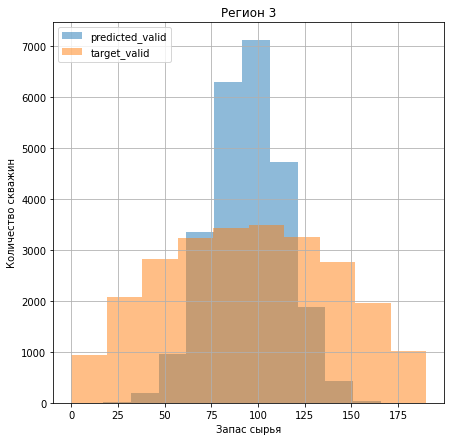

In [ ]:
plt.figure(figsize=(7,7))
plt.grid()

plt.hist(predicted_valid_3, alpha=0.5, label='predicted_valid');
plt.hist(target_valid_3, alpha=0.5, label='target_valid');

plt.title('Регион 3')
plt.xlabel('Запас сырья')
plt.ylabel('Количество скважин')
plt.legend(loc='upper left')

plt.show();

In [ ]:
print(f'Реальный средний запас сырья = {target_valid_3.mean()}')
print(f'Средний запас предсказанного сырья в регионе 3 = {predicted_valid_3.mean()}')

Реальный средний запас сырья = 94.88423280885438
Средний запас предсказанного сырья в регионе 3 = 94.96504596800489


Видим, реальный средний запас сырья и предсказанный моделью практически одинаковы. Значения с запасом сырья нормально распределены вокруг среднего. Распределение запасов сырья по скважинам в регионе 3 такое же, как и в регионе 1

In [ ]:
region_list.append(('Регион 3',predicted_valid_3.mean(), rmse_3, mae_3))

### Сравнение регионов

In [ ]:
region_list = pd.DataFrame(region_list)
region_list.columns = ['Название региона', 'Средний запас сырья', 'RMSE', 'MAE']
region_list

,Название региона,Средний запас сырья,RMSE,MAE
0,Регион 1,92.592568,37.579422,30.919601
1,Регион 2,68.728547,0.893099,0.718766
2,Регион 3,94.965046,40.029709,32.792652


Видим, что регион 1 и регион 3 имеют практически одинаковый средний запас сырья, однако у региона 3 чуть больше разброс вокруг среднего (RMSE больше чем у 1 региона) и чуть более явный экстремум распределения запаса по скважинам. У Региона 1 нет четкого пика распределения (он сглажен). Это влияет на потенциальную прибыль и риски 

## Подготовка к расчёту прибыли

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

### Точка безубытка разработки скажины

Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 

In [ ]:
budget = 10_000_000_000
income = 450_000 #доход с каждой ед продукции (тыс баррелей)
N = 200 #200 лучших точек

In [ ]:
# стоимость разработки одной скважины
cost_1 = budget / N
cost_1

50000000.0

In [ ]:
# мин объем для безубыточности
min_volume = budget / (income * N)
min_volume

111.11111111111111

Точка безубыточности достигается, если запас сырья в одной скважине не менее 111.1 тыс баррелей. В каждом из представленных регионов средний запас сырья ниже. Значит надо будет выбирать скажины с самым высоким запасом сырья

### Функция для расчёта прибыли по выбранным скважинам и предсказаниям модели

- Выберите скважины с максимальными значениями предсказаний. 
- Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
- Рассчитайте прибыль для полученного объёма сырья.

In [ ]:
def profit(predicted_volume, target):
    predicted_volume = predicted_volume.sort_values(ascending=False)
    product_volume = target[predicted_volume.index]
    product_volume = product_volume[:N]
    profit = product_volume * income - cost_1
    return profit.sum()

## Расчёт прибыли и рисков 

### Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

#### Регион 1

Регион 1

1 вариант

In [ ]:
values = []
state = np.random.RandomState(12345)
predicted_valid_1 = pd.Series(predicted_valid_1)
target_valid_1 = pd.Series(target_valid_1).reset_index(drop=True)

In [ ]:
for i in range(1000):
    target_subsample = target_valid_1.sample(n=500, replace=True, random_state=state)
    pred_volume_subsample = predicted_valid_1[target_subsample.index]
    pred_volume_subsample = pd.Series(pred_volume_subsample)
    money = profit(pred_volume_subsample, target_subsample)
    values.append(money)

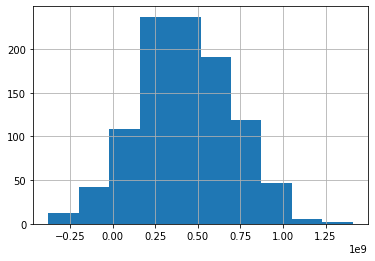

In [ ]:
values = pd.Series(values)
values.hist();

In [ ]:
print(f'Средняя прибыль по региону 1 = {(values.mean()/(10**6)):.2f} млн рублей')
print(f'Доверительный интервал: от 2.5% квантиль = \
{values.quantile(0.025)/(10**6):.2f} (млн руб)  до 97.5% квантиля = {values.quantile(0.975)/(10**6):.2f} (млн руб)')
print(f'Вероятность убытков = {((values < 0)*1).mean() * 100} %')

Средняя прибыль по региону 1 = 425.94 млн рублей
Доверительный интервал: от 2.5% квантиль = -102.09 (млн руб)  до 97.5% квантиля = 947.98 (млн руб)
Вероятность убытков = 6.0 %


In [ ]:
# сохраним результаты в список
result = []

In [ ]:
result.append(('Region 1 var 1 (valid)', values.mean()/(10**6),\
               values.quantile(0.025)/(10**6),  values.quantile(0.975)/(10**6), ((values < 0)*1).mean() * 100))

2 вариант 

In [ ]:
values_1 = []
state = np.random.RandomState(12345)
target_1 = df_0['product']
features_1 = df_0.drop(columns=['product'])

#получим предсказания объемов запаса сырья во всех скважинах
predicted_volume_1 = model_1.predict(features_1)

#bootstrap для построения распределения прибыли по региону 1
for i in range(1000):
    target_subsample = target_1.sample(n=500, replace=True, random_state=state)
    pred_volume_subsample = predicted_volume_1[target_subsample.index]
    pred_volume_subsample = pd.Series(pred_volume_subsample)
    target_subsample = pd.Series(target_subsample).reset_index(drop=True)
    money = profit(pred_volume_subsample, target_subsample)
    values_1.append(money)

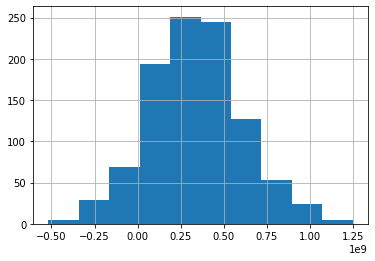

In [ ]:
values_1 = pd.Series(values_1)
values_1.hist();

Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [ ]:
print(f'Средняя прибыль по региону 1 = {(values_1.mean()/(10**6)):.2f} млн рублей')
print(f'Доверительный интервал: от 2.5% квантиль = \
{values_1.quantile(0.025)/(10**6):.2f} (млн руб)  до 97.5% квантиля = {values_1.quantile(0.975)/(10**6):.2f} (млн руб)')
print(f'Вероятность убытков = {((values_1 < 0)*1).mean() * 100} %')

Средняя прибыль по региону 1 = 337.79 млн рублей
Доверительный интервал: от 2.5% квантиль = -185.21 (млн руб)  до 97.5% квантиля = 907.92 (млн руб)
Вероятность убытков = 9.5 %


In [ ]:
result.append(('Region 1 variant 2 (all)', values_1.mean()/(10**6),\
               values_1.quantile(0.025)/(10**6),  values_1.quantile(0.975)/(10**6), ((values_1 < 0)*1).mean() * 100))

#### Регион 2

Вариант 1

In [ ]:
values = []
state = np.random.RandomState(12345)
predicted_valid_2 = pd.Series(predicted_valid_2)
target_valid_2 = pd.Series(target_valid_2).reset_index(drop=True)

for i in range(1000):
    target_subsample = target_valid_2.sample(n=500, replace=True, random_state=state)
    pred_volume_subsample = predicted_valid_2[target_subsample.index]
    pred_volume_subsample = pd.Series(pred_volume_subsample)
    money = profit(pred_volume_subsample, target_subsample)
    values.append(money)

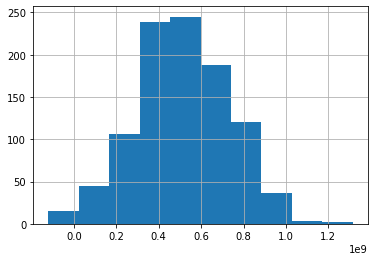

In [ ]:
values = pd.Series(values)
values.hist();

In [ ]:
print(f'Средняя прибыль по региону 2 = {(values.mean()/(10**6)):.2f} млн рублей')
print(f'Доверительный интервал: от 2.5% квантиль = \
{values.quantile(0.025)/(10**6):.2f} (млн руб)  до 97.5% квантиля = {values.quantile(0.975)/(10**6):.2f} (млн руб)')
print(f'Вероятность убытков = {((values < 0)*1).mean() * 100} %')

Средняя прибыль по региону 2 = 515.22 млн рублей
Доверительный интервал: от 2.5% квантиль = 68.87 (млн руб)  до 97.5% квантиля = 931.55 (млн руб)
Вероятность убытков = 1.0 %


In [ ]:
result.append(('Region 2 var 1 (valid)', values.mean()/(10**6),\
               values.quantile(0.025)/(10**6),  values.quantile(0.975)/(10**6), ((values < 0)*1).mean() * 100))

2 вариант

In [ ]:
values_2 = []
state = np.random.RandomState(12345)
target_2 = df_1['product']
features_2 = df_1.drop(columns=['product'])

#получим предсказания объемов запаса сырья во всех скважинах
predicted_volume_2 = model_2.predict(features_2)

#bootstrap для построения распределения прибыли по региону 2
for i in range(1000):
    target_subsample = target_2.sample(n=500, replace=True, random_state=state)
    pred_volume_subsample = predicted_volume_2[target_subsample.index]
    pred_volume_subsample = pd.Series(pred_volume_subsample)
    target_subsample = pd.Series(target_subsample).reset_index(drop=True)
    money = profit(pred_volume_subsample, target_subsample)
    values_2.append(money)

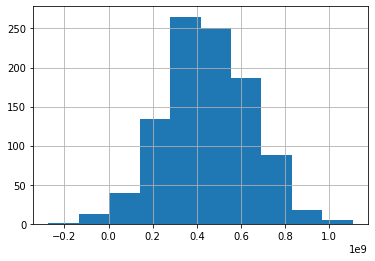

In [ ]:
values_2 = pd.Series(values_2)
values_2.hist();

In [ ]:
print(f'Средняя прибыль по региону 2 = {(values_2.mean()/(10**6)):.2f} млн рублей')
print(f'Доверительный интервал: от 2.5% квантиль = \
{values_2.quantile(0.025)/(10**6):.2f} (млн руб)  до 97.5% квантиля = {values_2.quantile(0.975)/(10**6):.2f} (млн руб)')
print(f'Вероятность убытков = {((values_2 < 0)*1).mean() * 100} %')

Средняя прибыль по региону 2 = 448.77 млн рублей
Доверительный интервал: от 2.5% квантиль = 38.89 (млн руб)  до 97.5% квантиля = 823.74 (млн руб)
Вероятность убытков = 1.4000000000000001 %


In [ ]:
result.append(('Region 2 variant 2 (all)', values_2.mean()/(10**6),\
               values_2.quantile(0.025)/(10**6),  values_2.quantile(0.975)/(10**6), ((values_2 < 0)*1).mean() * 100))

#### Регион 3

Вариант 1

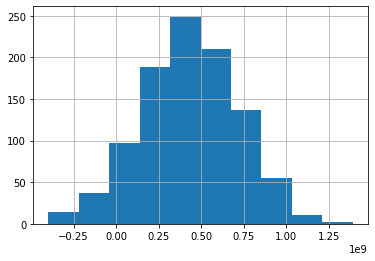

In [ ]:
values = []
state = np.random.RandomState(12345)
predicted_valid_3 = pd.Series(predicted_valid_3)
target_valid_3 = pd.Series(target_valid_3).reset_index(drop=True)

for i in range(1000):
    target_subsample = target_valid_3.sample(n=500, replace=True, random_state=state)
    pred_volume_subsample = predicted_valid_3[target_subsample.index]
    pred_volume_subsample = pd.Series(pred_volume_subsample)
    money = profit(pred_volume_subsample, target_subsample)
    values.append(money)
    
values = pd.Series(values)
values.hist();

In [ ]:
print(f'Средняя прибыль по региону 2 = {(values.mean()/(10**6)):.2f} млн рублей')
print(f'Доверительный интервал: от 2.5% квантиль = \
{values.quantile(0.025)/(10**6):.2f} (млн руб)  до 97.5% квантиля = {values.quantile(0.975)/(10**6):.2f} (млн руб)')
print(f'Вероятность убытков = {((values < 0)*1).mean() * 100} %')

Средняя прибыль по региону 2 = 435.01 млн рублей
Доверительный интервал: от 2.5% квантиль = -128.88 (млн руб)  до 97.5% квантиля = 969.71 (млн руб)
Вероятность убытков = 6.4 %


In [ ]:
result.append(('Region 3 var 1 (valid)', values.mean()/(10**6),\
               values.quantile(0.025)/(10**6),  values.quantile(0.975)/(10**6), ((values < 0)*1).mean() * 100))

2 вариант

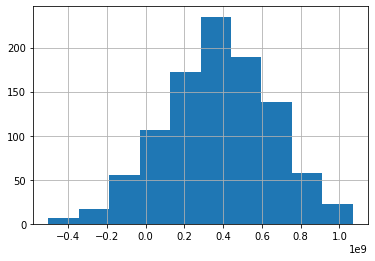

In [ ]:
values_3 = []
state = np.random.RandomState(12345)
target_3 = df_2['product']
features_3 = df_2.drop(columns=['product'])

#получим предсказания объемов запаса сырья во всех скважинах
predicted_volume_3 = model_3.predict(features_3)

#bootstrap для построения распределения прибыли по региону 2
for i in range(1000):
    target_subsample = target_3.sample(n=500, replace=True, random_state=state)
    pred_volume_subsample = predicted_volume_3[target_subsample.index]
    pred_volume_subsample = pd.Series(pred_volume_subsample)
    target_subsample = pd.Series(target_subsample).reset_index(drop=True)
    money = profit(pred_volume_subsample, target_subsample)
    values_3.append(money)
    
values_3 = pd.Series(values_3)
values_3.hist();

In [ ]:
print(f'Средняя прибыль по региону 3 = {(values_3.mean()/(10**6)):.2f} млн рублей')
print(f'Доверительный интервал: от 2.5% квантиль = \
{values_3.quantile(0.025)/(10**6):.2f} (млн руб)  до 97.5% квантиля = {values_3.quantile(0.975)/(10**6):.2f} (млн руб)')
print(f'Вероятность убытков = {((values_3 < 0)*1).mean() * 100} %')

Средняя прибыль по региону 3 = 373.40 млн рублей
Доверительный интервал: от 2.5% квантиль = -177.98 (млн руб)  до 97.5% квантиля = 893.99 (млн руб)
Вероятность убытков = 9.1 %


In [ ]:
result.append(('Region 3 variant 2 (all)', values_3.mean()/(10**6),\
               values_3.quantile(0.025)/(10**6),  values_3.quantile(0.975)/(10**6), ((values_3 < 0)*1).mean() * 100))

#### Результаты

In [ ]:
result = pd.DataFrame(result)
result.columns = ['Регион и вариант', 'Средняя прибыль (млн руб)', '2.5% квантиль', '97.5% квантиль', 'Риск убытков (%)']
result.sort_values(by='Средняя прибыль (млн руб)', ascending=False)

,Регион и вариант,Средняя прибыль (млн руб),2.5% квантиль,97.5% квантиль,Риск убытков (%)
2,Region 2 var 1 (valid),515.222773,68.873225,931.547591,1.0
3,Region 2 variant 2 (all),448.767974,38.892906,823.739730,1.4
4,Region 3 var 1 (valid),435.008363,-128.880547,969.706954,6.4
0,Region 1 var 1 (valid),425.938527,-102.090095,947.976353,6.0
5,Region 3 variant 2 (all),373.396685,-177.978894,893.986190,9.1
1,Region 1 variant 2 (all),337.787390,-185.210347,907.922153,9.5


Вывод:
- Регион 2 обладает самой большой потенциальной прибылью от 448 млн (вариант расчета 2) до 515 млн рублей (вариант расчета 1) при разработке 200 скважин и бюджете в 10 млрд руь на разработку (себестоимость 1 скважина = 50 млр рублей)
- Риск потенциальных убытков лежит в диапазоне от 1% до 1.4%
- Доверительный интервал прибыли по Региону 2 составил  от 68 млн до 931 млн рублей (вариант 1) или от 38 млн до 823 млн руб (вариант 2)
- в Регионе 2 интересное распределение сырья по скважинам - есть много пустых (16% из всех скажин) и столько же скважин "золотых жил". С помощью модели машинного обучения мы определяем скажины с наибольшим запасом и получаем максимальную потенциальную прибыль именно в Регионе 2
    